In [1]:
import xarray as xr
import matplotlib
import numpy as np
import os
import dask
from dask.distributed import Client
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import plotting_utils as plu
from scipy import stats, signal


#import plotting_utils as plu

#magic for plots to show up below cells
%matplotlib inline

In [2]:
user = 'mollyw'
user_path = '/glade/scratch/' + user + '/'
work_path = '/glade/work/' + user + '/DA_analysis'

In [3]:
free_test = 'free10c'
free_Cfrsnw = 'free30'
free_vonkar = 'free30_vonkar'
free_vkCfrsnw = 'free30_vkCfrsnw'
free_dragksno = 'free30_dragksno'
free_systemic = 'free30_systemic'
free_interaction = 'free30_interaction'
free_unperturbed = 'free30_unperturbed'

In [4]:
cases = [free_test, free_Cfrsnw, free_vonkar, free_vkCfrsnw, free_dragksno, free_systemic, free_interaction,free_unperturbed] #+ da_seas #da_test, da_loc01, da_loc10, da_loc15,
hemis = ['nh', 'sh']
volumes     = {}
areas       = {}

for case in cases:
    if case == free_test:
        ens = ['01','02','03','04','05','06','07','08','09','10']
    else:
        ens = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']
    
    volumes[case] = {}
    areas[case]   = {}
    for x in ens:
        eq_vols_file = '/icevol_dnh' + '_' + case + '_ens00{00}'.format(x) + '.txt'
        eq_area_file = '/icearea_dnh' + '_' + case + '_ens00{00}'.format(x) + '.txt'
        volumes[case]['ens_{00}'.format(x)] = np.loadtxt(work_path + '/volumes/' + case + eq_vols_file)
        areas[case]['ens_{00}'.format(x)]   = np.loadtxt(work_path + '/areas/' + case  + eq_area_file)
    mean_vols_file = '/icevol_dnh' + '_' + case + '_ensmean.txt'
    mean_area_file = '/icearea_dnh' + '_' + case + '_ensmean.txt'
    vol_temp = np.loadtxt(work_path + '/volumes/' + case + mean_vols_file)
    area_temp = np.loadtxt(work_path + '/areas/' + case + mean_area_file)
    
    volumes[case]['ensmean'] = vol_temp
    areas[case]['ensmean'] = area_temp*1000
    

free30
free30_vonkar
free30_dragksno
free30_systemic
free30_interaction
free30_unperturbed


Text(0.5, 0.98, 'Annual cycle of ensemble spread')

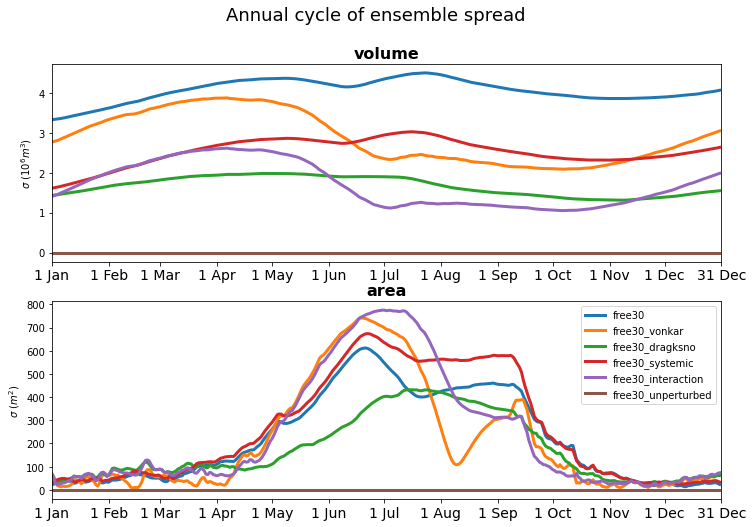

In [5]:
# load volumes and areas into a numpy array (time across columns, ensemble on rows)
stds = {}
free_cases = [free_Cfrsnw, 
              free_vonkar, 
#               free_vkCfrsnw, 
              free_dragksno, 
              free_systemic, 
              free_interaction, 
              free_unperturbed]

for c in free_cases:
    print(c)
    volmat = np.empty((30, 365))
    amat = np.empty((30, 365))
    count = 0
    if c == free_vonkar or c == free_vkCfrsnw:
        start_time = -471
        end_time = -106
    else:
        start_time = -366
        end_time = -1
    for x in ens:
        thing1 = volumes[c]['ens_{00}'.format(x)][start_time:end_time]
        volmat[count,:] = thing1#/np.linalg.norm(thing1, ord=2,keepdims=True)
        thing2 = areas[c]['ens_{00}'.format(x)][start_time:end_time] 
        amat[count,:] = thing2#/np.linalg.norm(thing2, ord=2, keepdims=True)
        count = count + 1
        
# calculate the standard deviation at every time point in the volumes array (std on the columns)     
    stdv = np.std(volmat, axis = 0)
    stda = np.std(amat, axis = 0)

# make a dictionary for all of the free cases 
    #store stds back into dictionary with keyword 
    stds[c + '_vol'] = volmat
    stds[c + '_area']= amat
    stds[c + '_stdv'] = stdv
    stds[c + '_stda'] = stda
    
# plot 
#evenly_spaced_interval = np.linspace(0, 1, len(free_cases))
#colors = [mpl.cm.tab20(x) for x in evenly_spaced_interval]
#count = 0
fig, axes = plt.subplots(figsize = (12,8));
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
for c in free_cases:
    ax1.plot(stds[c +'_stdv'], linewidth = 3)
    ax2.plot(stds[c +'_stda'], linewidth = 3, label = c)
    #count = count + 1

ax1.set_xlim(0,365)
ax2.set_xlim(0,365)
ax1.set_xticks([0,31,31+28,31+28+31,31+28+31+30,31+28+31+30+31,31+28+31+30+31+30,31+28+31+30+31+30+31,31+28+31+30+31+30+31+31,31+28+31+30+31+30+31+31+30,31+28+31+30+31+30+31+31+30+31,31+28+31+30+31+30+31+31+30+31+30,31+28+31+30+31+30+31+31+30+31+30+31])
ax1.set_xticklabels(['1 Jan','1 Feb','1 Mar','1 Apr','1 May','1 Jun','1 Jul','1 Aug','1 Sep','1 Oct','1 Nov','1 Dec','31 Dec'], fontsize=14)
ax2.set_xticks([0,31,31+28,31+28+31,31+28+31+30,31+28+31+30+31,31+28+31+30+31+30,31+28+31+30+31+30+31,31+28+31+30+31+30+31+31,31+28+31+30+31+30+31+31+30,31+28+31+30+31+30+31+31+30+31,31+28+31+30+31+30+31+31+30+31+30,31+28+31+30+31+30+31+31+30+31+30+31])
ax2.set_xticklabels(['1 Jan','1 Feb','1 Mar','1 Apr','1 May','1 Jun','1 Jul','1 Aug','1 Sep','1 Oct','1 Nov','1 Dec','31 Dec'], fontsize=14) 
ax2.legend()
ax1.set_ylabel('$\sigma$ ($10^6 m^3$)')
ax2.set_ylabel('$\sigma$ ($m^2$)')
ax1.set_title('volume', fontsize=16, fontweight = 'bold')
ax2.set_title('area', fontsize=16, fontweight = 'bold')
plt.suptitle('Annual cycle of ensemble spread', fontsize = 18)

Text(0.5, 0.98, 'Annual cycle of ensemble spread')

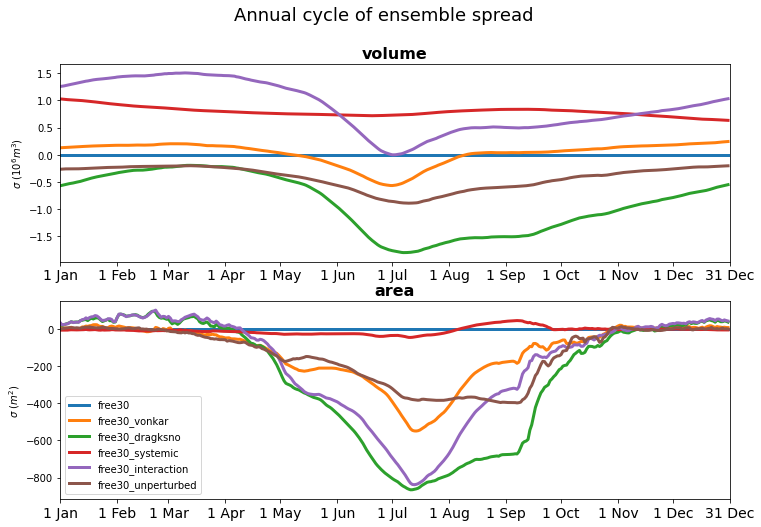

In [6]:
fig, axes = plt.subplots(figsize = (12,8));
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
for c in free_cases:
    ax1.plot(volumes['free30']['ensmean'][-365:] - volumes[c]['ensmean'][-365:], linewidth = 3)
    ax2.plot(areas['free30']['ensmean'][-365:] - areas[c]['ensmean'][-365:], linewidth = 3, label = c)
    #count = count + 1

ax1.set_xlim(0,365)
ax2.set_xlim(0,365)
ax1.set_xticks([0,31,31+28,31+28+31,31+28+31+30,31+28+31+30+31,31+28+31+30+31+30,31+28+31+30+31+30+31,31+28+31+30+31+30+31+31,31+28+31+30+31+30+31+31+30,31+28+31+30+31+30+31+31+30+31,31+28+31+30+31+30+31+31+30+31+30,31+28+31+30+31+30+31+31+30+31+30+31])
ax1.set_xticklabels(['1 Jan','1 Feb','1 Mar','1 Apr','1 May','1 Jun','1 Jul','1 Aug','1 Sep','1 Oct','1 Nov','1 Dec','31 Dec'], fontsize=14)
ax2.set_xticks([0,31,31+28,31+28+31,31+28+31+30,31+28+31+30+31,31+28+31+30+31+30,31+28+31+30+31+30+31,31+28+31+30+31+30+31+31,31+28+31+30+31+30+31+31+30,31+28+31+30+31+30+31+31+30+31,31+28+31+30+31+30+31+31+30+31+30,31+28+31+30+31+30+31+31+30+31+30+31])
ax2.set_xticklabels(['1 Jan','1 Feb','1 Mar','1 Apr','1 May','1 Jun','1 Jul','1 Aug','1 Sep','1 Oct','1 Nov','1 Dec','31 Dec'], fontsize=14) 
ax2.legend()
ax1.set_ylabel('$\sigma$ ($10^6 m^3$)')
ax2.set_ylabel('$\sigma$ ($m^2$)')
ax1.set_title('volume', fontsize=16, fontweight = 'bold')
ax2.set_title('area', fontsize=16, fontweight = 'bold')
plt.suptitle('Annual cycle of ensemble spread', fontsize = 18)

Text(0.5, 0.98, 'Annual cycle of ensemble spread')

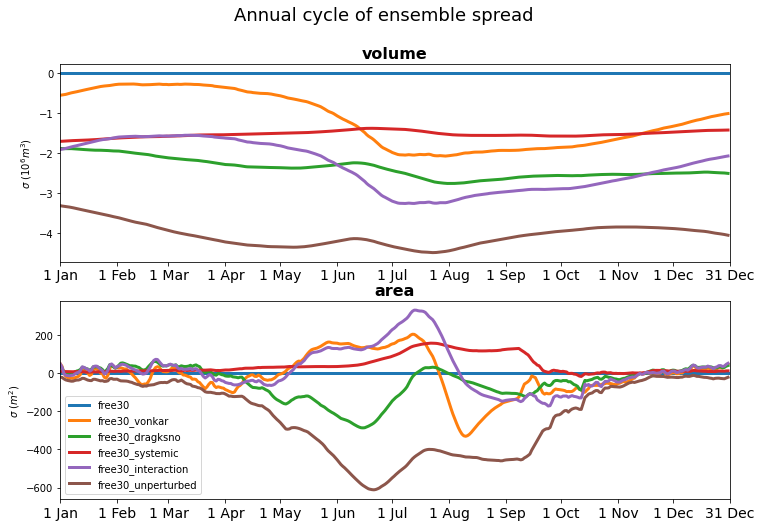

In [8]:
fig, axes = plt.subplots(figsize = (12,8));
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
for c in free_cases:
    ax1.plot(stds[c +'_stdv'] - stds['free30_stdv'], linewidth = 3)
    ax2.plot(stds[c +'_stda'] - stds['free30_stda'], linewidth = 3, label = c)
    #count = count + 1

ax1.set_xlim(0,365)
ax2.set_xlim(0,365)
ax1.set_xticks([0,31,31+28,31+28+31,31+28+31+30,31+28+31+30+31,31+28+31+30+31+30,31+28+31+30+31+30+31,31+28+31+30+31+30+31+31,31+28+31+30+31+30+31+31+30,31+28+31+30+31+30+31+31+30+31,31+28+31+30+31+30+31+31+30+31+30,31+28+31+30+31+30+31+31+30+31+30+31])
ax1.set_xticklabels(['1 Jan','1 Feb','1 Mar','1 Apr','1 May','1 Jun','1 Jul','1 Aug','1 Sep','1 Oct','1 Nov','1 Dec','31 Dec'], fontsize=14)
ax2.set_xticks([0,31,31+28,31+28+31,31+28+31+30,31+28+31+30+31,31+28+31+30+31+30,31+28+31+30+31+30+31,31+28+31+30+31+30+31+31,31+28+31+30+31+30+31+31+30,31+28+31+30+31+30+31+31+30+31,31+28+31+30+31+30+31+31+30+31+30,31+28+31+30+31+30+31+31+30+31+30+31])
ax2.set_xticklabels(['1 Jan','1 Feb','1 Mar','1 Apr','1 May','1 Jun','1 Jul','1 Aug','1 Sep','1 Oct','1 Nov','1 Dec','31 Dec'], fontsize=14) 
ax2.legend()
ax1.set_ylabel('$\sigma$ ($10^6 m^3$)')
ax2.set_ylabel('$\sigma$ ($m^2$)')
# ax2.set_ylim([-200, 200])
ax1.set_title('volume', fontsize=16, fontweight = 'bold')
ax2.set_title('area', fontsize=16, fontweight = 'bold')
plt.suptitle('Annual cycle of ensemble spread', fontsize = 18)

Text(0.5, 1.0, 'area')

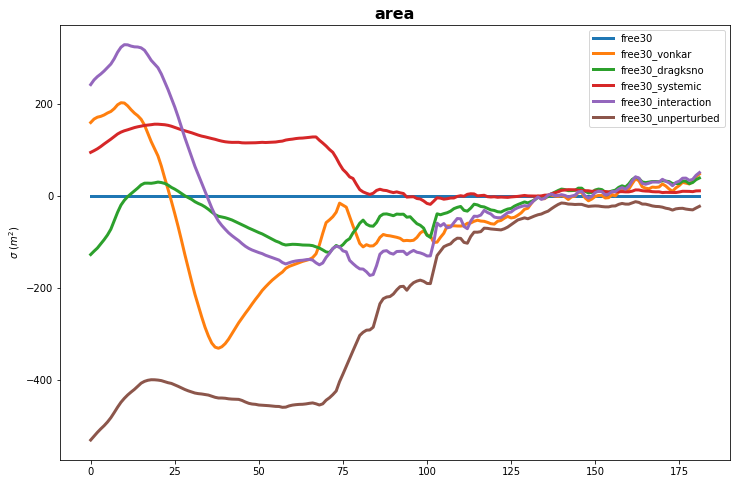

In [13]:
fig = plt.figure(figsize = (12,8));
for c in free_cases:
    plt.plot(stds[c +'_stda'][-182:] - stds['free30_stda'][-182:], linewidth = 3, label = c)
    #count = count + 1

# plt.xlim(0,365)
# plt.xticks([0,31,31+28,31+28+31,31+28+31+30,31+28+31+30+31,31+28+31+30+31+30,31+28+31+30+31+30+31,31+28+31+30+31+30+31+31,31+28+31+30+31+30+31+31+30,31+28+31+30+31+30+31+31+30+31,31+28+31+30+31+30+31+31+30+31+30,31+28+31+30+31+30+31+31+30+31+30+31])
# plt.xticklabels(['1 Jan','1 Feb','1 Mar','1 Apr','1 May','1 Jun','1 Jul','1 Aug','1 Sep','1 Oct','1 Nov','1 Dec','31 Dec'], fontsize=14)
plt.legend()
plt.ylabel('$\sigma$ ($m^2$)')
plt.title('area', fontsize=16, fontweight = 'bold')
# plt.suptitle('Annual cycle of ensemble spread', fontsize = 18)

In [ ]:
# Initialize figure
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize=(15,15))

# set GridSpecs
xrange = np.arange(0,365,365/11)
gs = fig.add_gridspec(3, 2)

ax1 = plt.subplot(gs[0, :])
ax1.grid(b=True, which='major', axis='y')
plt.style.use('seaborn-white')

ax2 = plt.subplot(gs[1, :])
ax2.grid(b=True, which='major', axis='y')
plt.style.use('seaborn-white')

ax3 = plt.subplot(gs[-1, 0])
ax3.grid(b=True, which='major', axis='y')
plt.style.use('seaborn-white')

ax4 = plt.subplot(gs[-1, 1])
ax4.grid(b=True, which='major', axis='y')
plt.style.use('seaborn-white')



# Choose ensemble case
case = free_dragksno

# Choose ensemble size
if case == da_test or case == free_test:
    ens = ['01','02','03','04','05','06','07','08','09','10']
else:
    ens = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30']
    
# Choose timeframe to examine in subplots 
start_time = -365  #-470 #
end_time = -1 #105
time_mean = -365

# Plot ensemble 
for x in ens:
    if ens == '01':
        ax1.plot(volumes[case]['ens_{00}'.format(x)], c = 'darkgray', label = 'ensemble member')
        ax2.plot(areas[case]['ens_{00}'.format(x)], c = 'darkgray', label = 'ensemble member')
        ax3.plot(volumes[case]['ens_{00}'.format(x)][start_time:end_time], c = 'darkgray', label = 'ensemble member')
        ax4.plot(areas[case]['ens_{00}'.format(x)][start_time:end_time], c = 'darkgray', label = 'ensemble member')
    else:
        ax1.plot(volumes[case]['ens_{00}'.format(x)], c = 'darkgray')
        ax2.plot(areas[case]['ens_{00}'.format(x)], c = 'darkgray')
        ax3.plot(volumes[case]['ens_{00}'.format(x)][start_time:end_time], c = 'darkgray')
        ax4.plot(areas[case]['ens_{00}'.format(x)][start_time:end_time], c = 'darkgray')

# Plot ensemble means (red) 
ax1.plot(volumes[case]['ensmean'], LineWidth = 3, c = 'crimson', label='ensemble mean')
ax2.plot(areas[case]['ensmean'], LineWidth = 3, c = 'royalblue', label='ensemble mean')
ax3.plot(volumes[case]['ensmean'][-365:], LineWidth = 3, c = 'crimson', label='ensemble mean')
ax4.plot(areas[case]['ensmean'][-365:], LineWidth = 3, c = 'royalblue', label='ensemble mean')

ax3.legend(fontsize=16, loc='upper right')
ax4.legend(fontsize=16, loc='upper right')
ax1.set_title('volume, full record: ' + case)
ax2.set_title('area, full record: ' + case)
ax3.set_title('volume, annual cycle')
ax4.set_title('area, annual cycle')

ax1.set_xlim([0, (365*4+120)])
ax2.set_xlim([0, (365*4+120)])
ax3.set_xlim([0, 365])
ax4.set_xlim([0, 365])

ax1.set_ylim([0, 40])
ax2.set_ylim([0, 16000])
ax3.set_ylim([0, 40])
ax4.set_ylim([0, 16000])



# fig.plt.spines['right'].set_visible(False)
# fig.plt.spines['top'].set_visible(False)
#ax.set_ylim([0,16000])
#ax.set_xlim([0,365])
#ax.set_yticks([2000, 4000, 6000,8000,10000,12000,14000,16000,18000])
#ax.set_xticks([0,31,31+28,31+28+31,31+28+31+30,31+28+31+30+31,31+28+31+30+31+30,31+28+31+30+31+30+31,31+28+31+30+31+30+31+31,31+28+31+30+31+30+31+31+30,31+28+31+30+31+30+31+31+30+31,31+28+31+30+31+30+31+31+30+31+30,31+28+31+30+31+30+31+31+30+31+30+31])
#ax.set_yticklabels([2,4,6,8,10,12,14,16,18], fontweight='bold',fontsize=14)
#ax.set_xticklabels(['1 Jan','1 Feb','1 Mar','1 Apr','1 May','1 Jun','1 Jul','1 Aug','1 Sep','1 Oct','1 Nov','1 Dec','31 Dec'],fontweight='bold', fontsize=14)
#plt.title('30 member ensemble',fontsize=20)
plt.suptitle('no data assimilation, n = 30', fontsize=24)

#ax.set_ylabel('sea ice volume (10$^6$ km$^3$)', fontsize=20)